Naynish Kumar Namdeo
MCAN1CA23047

VEHICLE SALES PREDICTION

In [50]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [52]:
print('The size of Dataframe is: ', df.shape)
print('\n')

The size of Dataframe is:  (301, 10)




In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [54]:
df.isnull()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False


In [55]:
# To find total_missing_values in different columns of data and their percentage
def missing_data(data):
    """
    This will take in a dataframe and
    finds the total_missing_values as well as percentage of the value counts
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [56]:
missing_data(data= df)

,Total,Percent
Car_Name,0,0.0
company,0,0.0
Year,0,0.0
Selling_Price,0,0.0
Present_Price,0,0.0
Kms_Driven,0,0.0
Fuel_Type,0,0.0
Seller_Type,0,0.0
Transmission,0,0.0
Owner,0,0.0


In [57]:
print("'Fuel_Type' variable have {} unique category : {}\n".format(df['Fuel_Type'].nunique(), df['Fuel_Type'].unique()))
print("'Seller_Type' variable have {} unique category : {}\n".format(df['Seller_Type'].nunique(), \
                                                                     df['Seller_Type'].unique()))
print("'Transmission' variable have {} unique category : {}\n".format(df['Transmission'].nunique(), \
                                                                    df['Transmission'].unique()))
print("'Owner' variable have {} unique category : {}".format(df['Owner'].nunique(), df['Owner'].unique()))

'Fuel_Type' variable have 3 unique category : ['Petrol' 'Diesel' 'CNG']

'Seller_Type' variable have 2 unique category : ['Dealer' 'Individual']

'Transmission' variable have 2 unique category : ['Manual' 'Automatic']

'Owner' variable have 3 unique category : [0 1 3]


In [58]:
df['Owner'].replace(to_replace=3, value=2, inplace= True)
print("'Owner' variable have {} unique category : {}".format(df['Owner'].nunique(), df['Owner'].unique()))

'Owner' variable have 3 unique category : [0 1 2]


In [59]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.039867
std,2.891554,5.082812,8.644115,38886.883882,0.212302
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000


In [60]:
df.describe(include= 'object')

,Car_Name,company,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301,301
unique,98,9,3,2,2
top,city,honda,Petrol,Dealer,Manual
freq,26,70,239,195,261


In [61]:
df.columns

Index(['Car_Name', 'company', 'Year', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [62]:
# Create a new variable 'Current_Year'
df['Current_Year'] = 2020

# Calculate how old the car is, I created new feature "No_of_Years"
df['No_of_Years'] = df['Current_Year'] - df['Year']

df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


#### Remove features

In [63]:
final_df = df.copy()            # Creating copy of created dataframe
final_df.drop(labels= ['Car_Name','company','Year', 'Current_Year'], axis= 1, inplace= True)          #droping unnecessary features

final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


<h2>Data Visualization</h2><a id="4"></a>

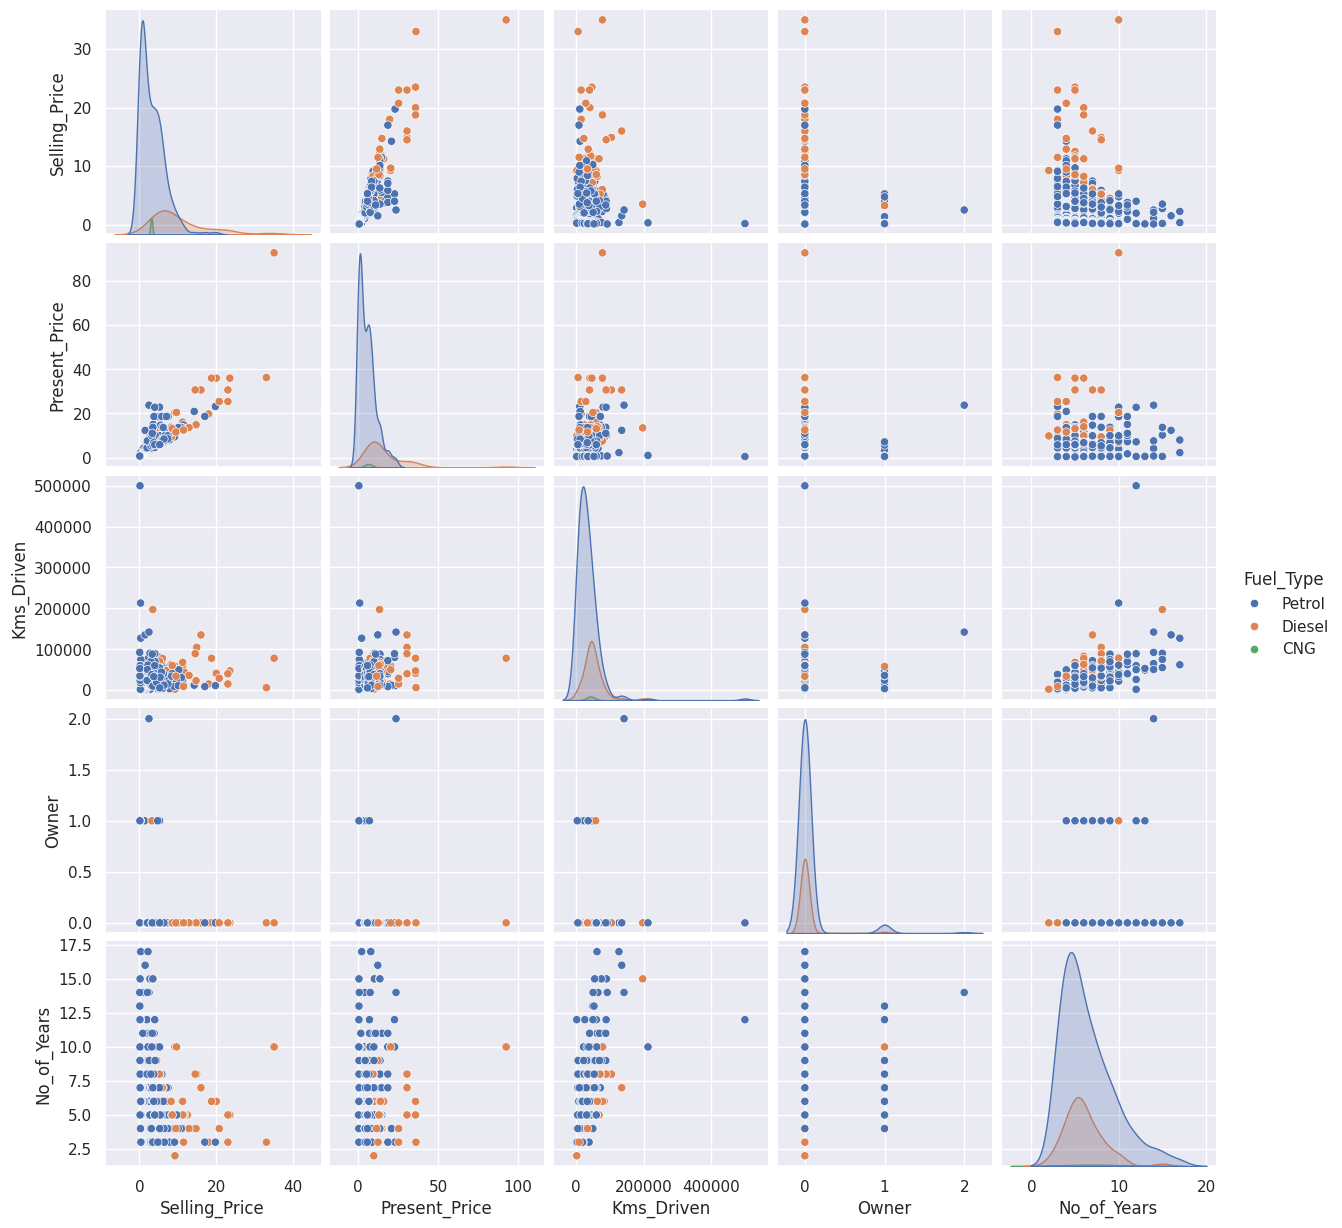

In [64]:
sns.pairplot(data= final_df, hue= 'Fuel_Type', diag_kind= 'kde')

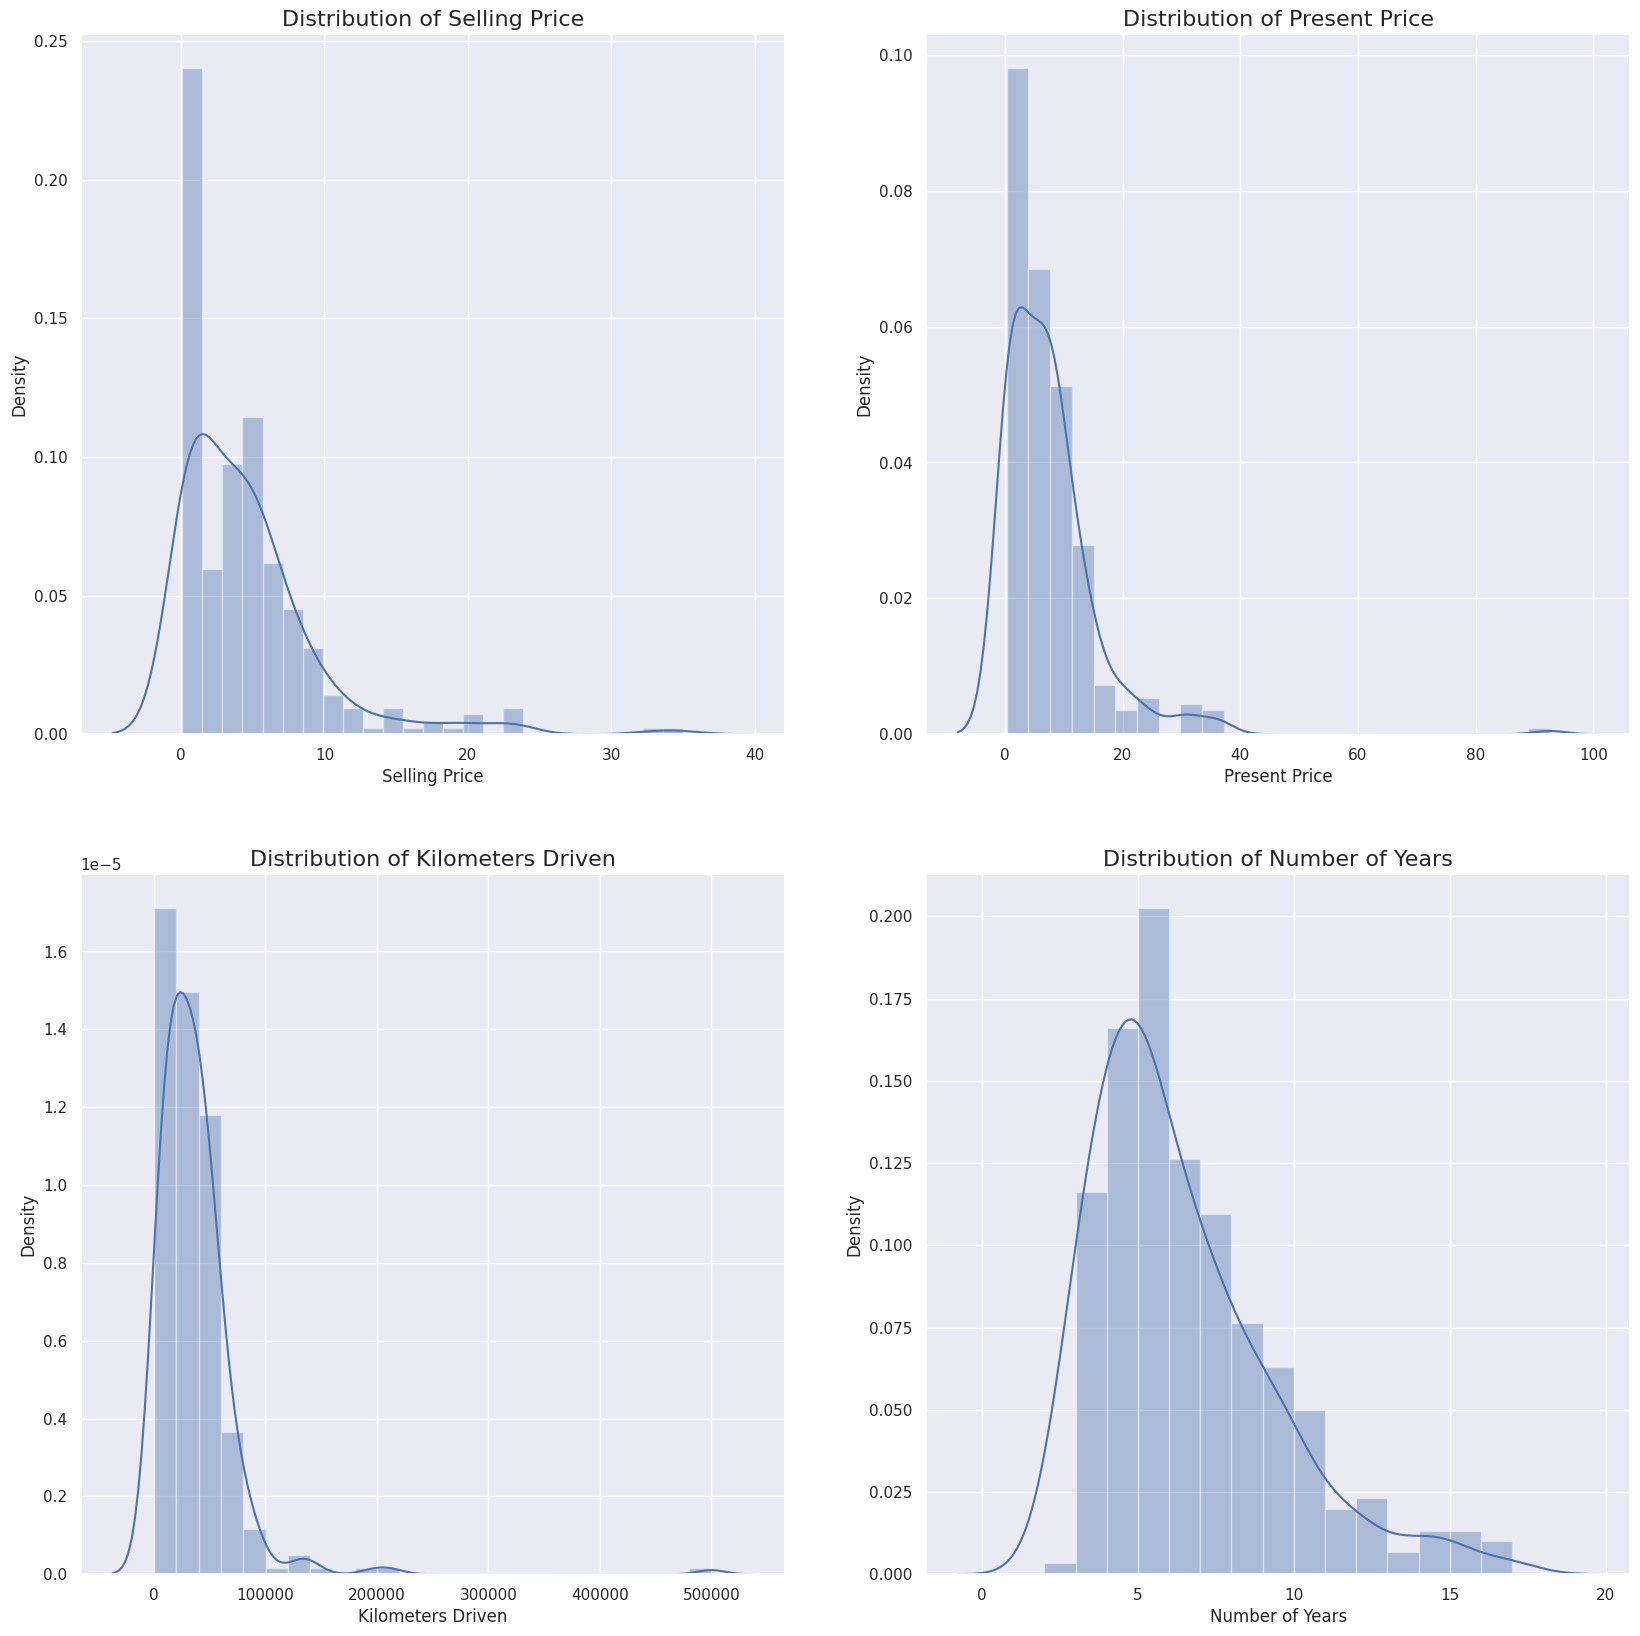

In [65]:
# Distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distplot of 'Selling_Price' feature
k1 = sns.distplot(a = final_df['Selling_Price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Selling Price', fontsize=16)
ax0.set(xlabel= 'Selling Price', ylabel= 'Density')

# Subplot 2: Distplot of 'Present_Price' feature
k2 = sns.distplot(a = final_df['Present_Price'], bins= 25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Present Price', fontsize=16)
ax1.set(xlabel= 'Present Price', ylabel= 'Density')

# Subplot 3: Distplot of 'Kms_Driven' feature
k1 = sns.distplot(a = final_df['Kms_Driven'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

# Subplot 4: Distplot of 'No_of_Years' feature
k1 = sns.distplot(a = final_df['No_of_Years'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Number of Years', fontsize=16)
ax3.set(xlabel= 'Number of Years', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")

In [66]:
print("'No_of_Years' variable have {} unique category : {}".format(final_df['No_of_Years'].nunique(),
                                                                   final_df['No_of_Years'].unique()))

'No_of_Years' variable have 16 unique category : [ 6  7  3  9  2  5  4 11 10  8 17 12 14 15 16 13]


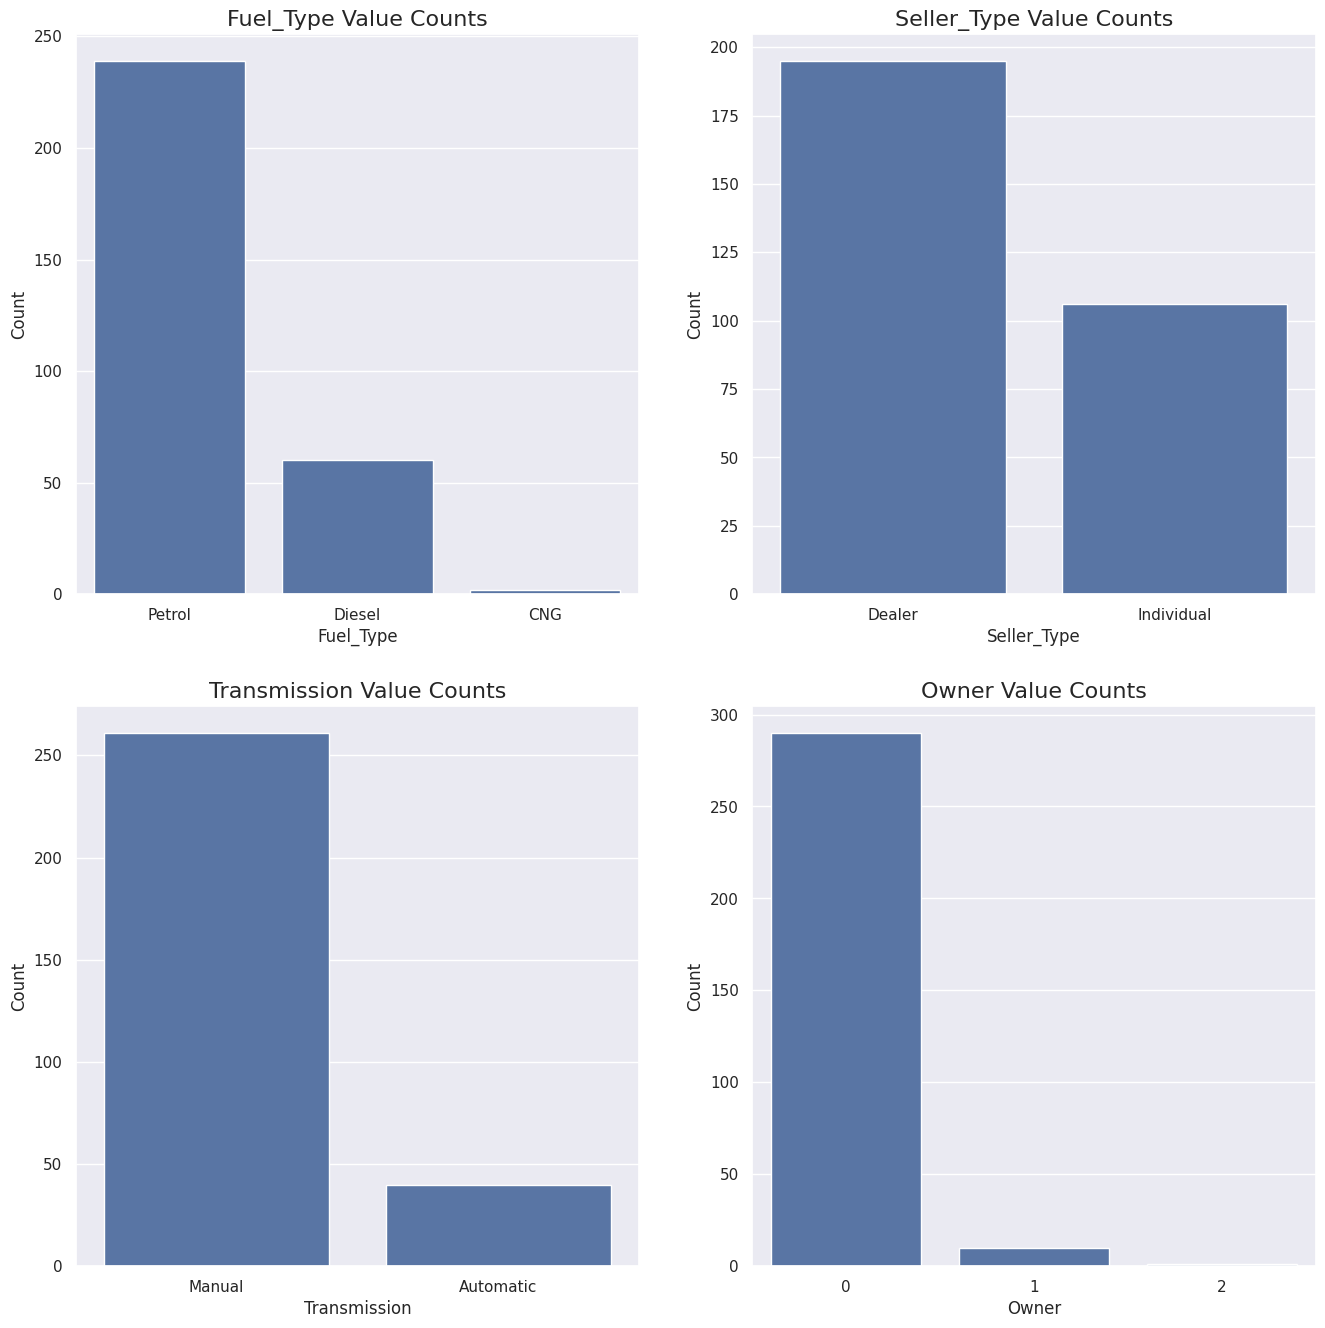

In [67]:
# Categorical feature value counts
fig = plt.figure(figsize=(16,16)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Countplot of 'Fuel_Type' feature
k1 = sns.countplot(data = final_df, x = 'Fuel_Type', ax= ax0) # add to subplot 1
ax0.set_title('Fuel_Type Value Counts', fontsize=16)
ax0.set(xlabel= 'Fuel_Type', ylabel= 'Count')

# Subplot 2: Countplot of 'Seller_Type' feature
k2 = sns.countplot(data = final_df, x = 'Seller_Type', ax= ax1) # add to subplot 2
ax1.set_title('Seller_Type Value Counts', fontsize=16)
ax1.set(xlabel= 'Seller_Type', ylabel= 'Count')

# Subplot 3: Countplot of 'Transmission' feature
k1 = sns.countplot(data = final_df, x = 'Transmission', ax= ax2) # add to subplot 3
ax2.set_title('Transmission Value Counts', fontsize=16)
ax2.set(xlabel= 'Transmission', ylabel= 'Count')

# Subplot 4: Countplot of 'Owner' feature
k1 = sns.countplot(data = final_df, x = 'Owner', ax= ax3) # add to subplot 4
ax3.set_title('Owner Value Counts', fontsize=16)
ax3.set(xlabel= 'Owner', ylabel= 'Count')

plt.show()
#fig.savefig("Distributionplot.png")

Text(0.5, 1.0, 'Number of Years Value Counts')

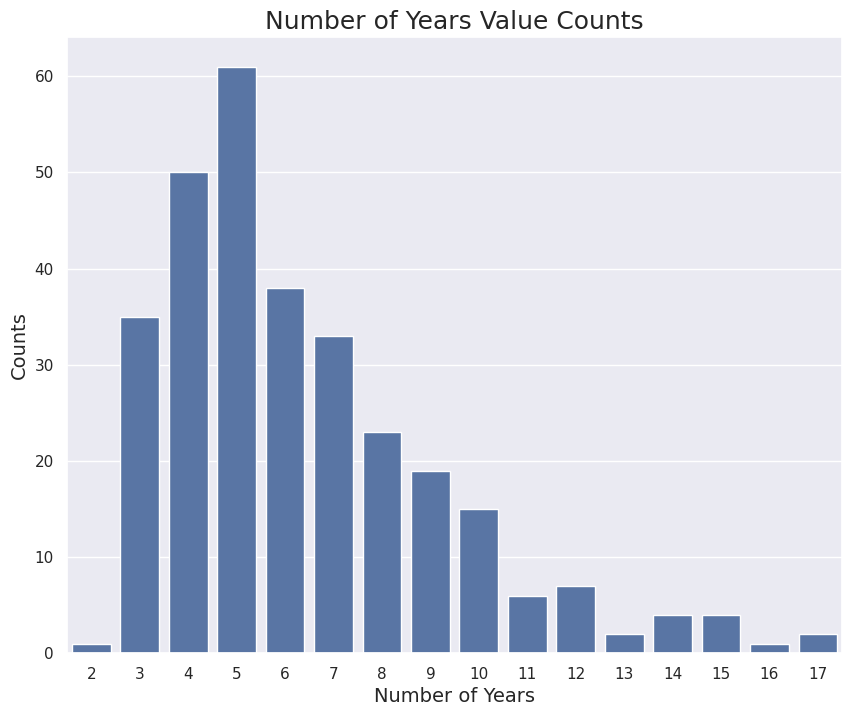

In [68]:
plt.figure(figsize=(10,8))
sns.countplot(data= final_df, x= 'No_of_Years')
plt.xlabel('Number of Years', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number of Years Value Counts', fontsize=18)

In [69]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


<Axes: >

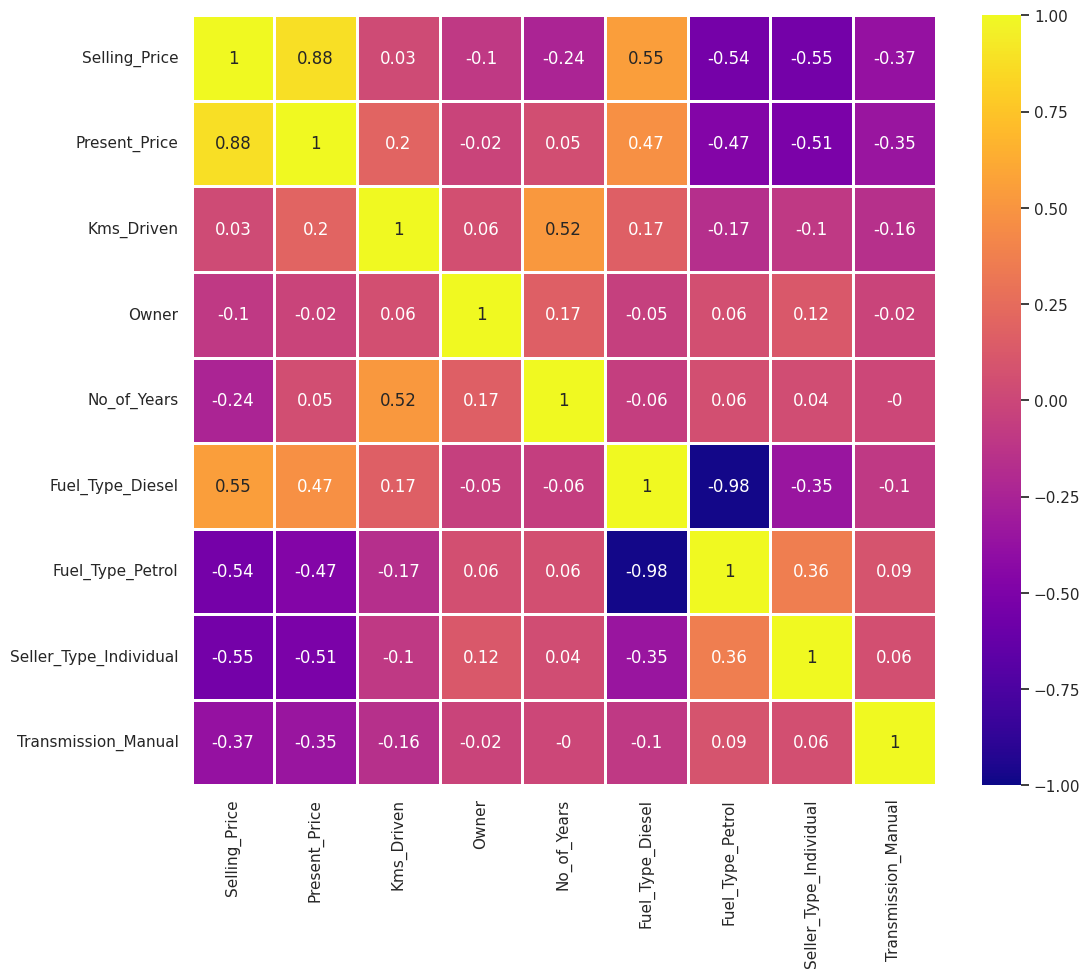

In [70]:
plt.figure(figsize=(12,10))
sns.heatmap(data = final_df.corr().round(2), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)

In [71]:
# Checking data types of variables
final_df.dtypes

,0
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Owner,int64
No_of_Years,int64
Fuel_Type_Diesel,bool
Fuel_Type_Petrol,bool
Seller_Type_Individual,bool
Transmission_Manual,bool


In [72]:
# Converting the datatypes of variables as of required datatype
final_df['Fuel_Type_Diesel'] = final_df['Fuel_Type_Diesel'].astype('int64')
final_df['Fuel_Type_Petrol'] = final_df['Fuel_Type_Petrol'].astype('int64')
final_df['Seller_Type_Individual'] = final_df['Seller_Type_Individual'].astype('int64')
final_df['Transmission_Manual'] = final_df['Transmission_Manual'].astype('int64')

In [73]:
X = final_df.iloc[:, 1:]            # Feature matrix (independent variables)
y = final_df.iloc[:, 0]             # Target variable (dependent variable)

In [74]:
# Checking important feature
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [75]:
print(model.feature_importances_)

[3.91762554e-01 4.05391312e-02 2.99489353e-04 7.55015036e-02
 2.12408084e-01 1.68140192e-02 1.25783479e-01 1.36891739e-01]


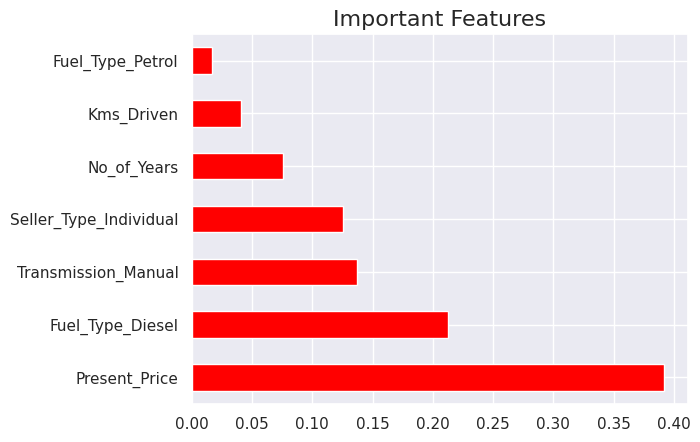

In [76]:
#plot graph of feature importances for better visualization

imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h2>Model Building</h2><a id="5"></a>

In [78]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [79]:
## Hyperparameters
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [80]:
# Create the random grid
random_grid= {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [81]:
from sklearn.model_selection import RandomizedSearchCV
regressor_random = RandomizedSearchCV(estimator=  regressor, param_distributions=  random_grid, scoring= 'neg_mean_squared_error', \
                                      n_iter = 10, cv=5, verbose = 2, random_state=42, n_jobs=1)
regressor_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
y_predictions = regressor_random.predict(X_test)
y_predictions

array([ 3.63007,  0.72558,  3.69173,  5.385  ,  0.32639,  0.46048,
        5.7427 ,  0.61878,  2.93563, 21.41913,  0.45976,  0.34443,
        0.49572,  2.20382,  1.29076, 11.24629,  5.15939,  3.92761,
        6.1535 ,  5.23691,  2.96736,  8.87656,  0.98837,  0.45209,
        1.09174,  1.13535,  8.47835,  1.16589,  6.29754,  8.53297,
        4.48036,  3.76556,  2.52377,  5.3089 ,  2.41445,  2.82835,
        1.21567,  3.36149,  0.92554,  3.69097, 11.12731,  7.35836,
        7.25515,  5.36662,  4.4671 ,  0.39884,  3.37143,  0.29017,
        7.33655,  0.66006,  6.29074,  1.23568,  3.20593,  8.97608,
        0.65056,  2.79565,  3.8733 ,  0.43871,  1.02406,  8.84959,
       19.53911])

### Predicting Test Data by visualizing


Text(0.5, 1.0, 'True value Vs Predicted values of Selling Price')

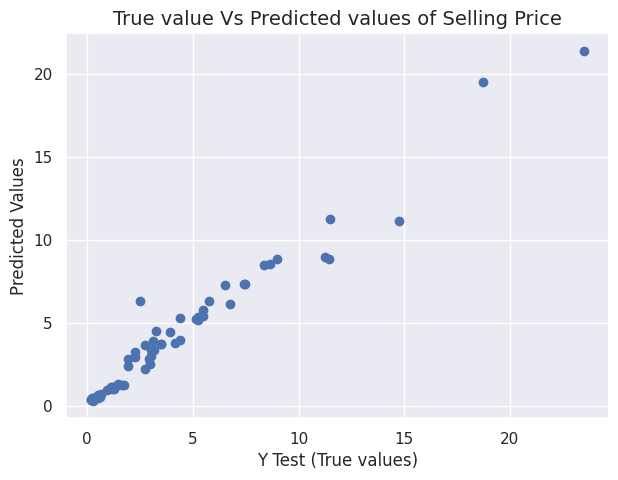

In [83]:
plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= y_predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Selling Price', fontsize=14)

### Residuals

<Axes: xlabel='Selling_Price', ylabel='Density'>

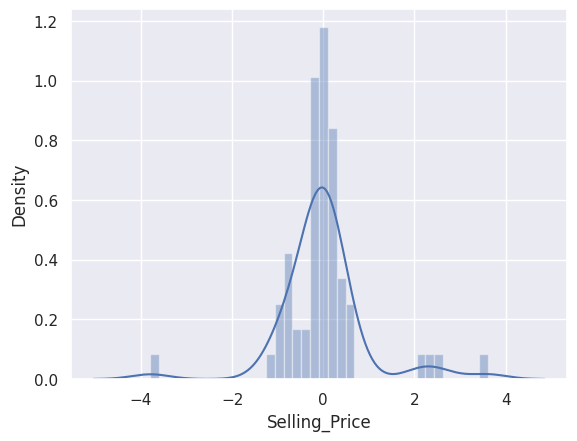

In [84]:
sns.distplot(y_test - y_predictions)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predictions))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_predictions))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('\nExplaned Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_predictions))

Mean Absolute Error:  0.5240193442622965
Mean Squareed Error:  0.8828288194688558
Root Mean Square Error:  0.939589708047537

Explaned Variance Score:  0.9569875429422571


In [86]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R-Squared: {r2_score(y_test, y_pred)}")


Linear Regression Performance:
Mean Absolute Error (MAE): 0.9504037773159927
Mean Squared Error (MSE): 2.010013764944934
R-Squared: 0.9020673305820182


In [87]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)


In [88]:
# Evaluate the Decision Tree Regressor
print("Decision Tree Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R-Squared: {r2_score(y_test, y_pred)}")


Decision Tree Regressor Performance:
Mean Absolute Error (MAE): 0.9126229508196719
Mean Squared Error (MSE): 4.403995081967213
R-Squared: 0.7854268453268385


In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
# Initialize the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [91]:
# Make predictions on the test set
y_pred_gb = gb_regressor.predict(X_test)

# Evaluate the model
print("Gradient Boosting Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gb)}")
print(f"R-Squared: {r2_score(y_test, y_pred_gb)}")

Gradient Boosting Regressor Performance:
Mean Absolute Error (MAE): 0.517907074617125
Mean Squared Error (MSE): 0.9963381882177915
R-Squared: 0.9514560247710955
